# K Means and K Medoids












In [1]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2020-02-03 13:52:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

100%[======================================>] 4,551       --.-K/s   in 0s      

2020-02-03 13:52:49 (18.8 MB/s) - ‘iris.data’ saved [4551/4551]



In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt




## Data Cleaning, Processing


In [23]:
def get_data(filename,class_column):
    """
        Returns train_df , val_df, test_df , dict_map
        filename     : Relative filename of the directory
        class_column : Name of the class column
        ratio        : train_ratio
    """
    
    df = pd.read_csv(filename,header=None)
    
    train = { 'x' : []  }

    classes  = df[class_column].unique().tolist()
    dict_map = dict(enumerate(classes))
    
    for index,clss in dict_map.items():
        
        clss_df = df[df[class_column] == clss].sample(frac=1)
        clss_df = clss_df.drop(columns=class_column)
        n_rows = len(clss_df) 
        train['x'].append(clss_df.iloc[0 : n_rows].values.reshape(-1,4))     
    
    train['x'] = np.concatenate(train['x'])

    return train

def get_fake_data():
    
    train = dict()
    train['x'] = np.array([ [100,5],
                            [90,7],
                            [15,96],
                            [20,105],
                            [85,12],
                            [18,110]
                         ])
    return train
    

In [24]:
train_iris = get_data("iris.data",4)
train_fake = get_fake_data()


## K - Means

In [168]:
class K_Means:

    def __init__(self,data,k):
        self.data = data
        
#         self.centroids = data[np.random.choice(data.shape[0],k)]
        self.centroids = data[:k]
        
        self.k = k
        self.data_clss = np.random.randint(0,high = k-1,size=(data.shape[0]))
        
    def train(self,no_iters):
        
        for i in range(no_iters):
            distances = np.sqrt(((self.data - self.centroids[:,np.newaxis])**2).sum())
            closest_point_idx = np.argmin(distances,axis=0)
            
#             self.centroids = np.array([self.data[closest_point_idx==k].mean(axis=0) for k in range(self.centroids.shape[0])])
#             print(neigh_centroid)
    def predict(self,test_point):
    
            
    def visualize(self):
        
        plt.scatter(self.data[:,0],self.data[:,1])
        plt.scatter(self.centroids[:,0],self.centroids[:,1])
        
    
    
    

In [169]:
a = K_Means(train_fake['x'],2)

In [170]:
a.train(10)

/home/nitdelhi107/Documents/171210029/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/home/nitdelhi107/Documents/171210029/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


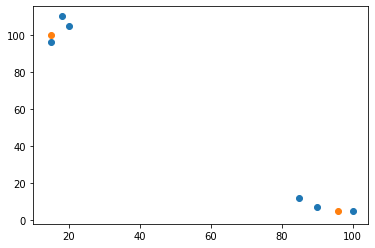

In [171]:
a.visualize()

In [146]:
a.centroids

array([[ 15,  96],
       [100,   5]])

In [147]:
train_fake['x'][0]

array([15, 96])

In [150]:
np.sqrt(((train_fake['x'][0] - a.centroids[0])**2).sum())

0.0

In [126]:
a

In [130]:
index = np.random.choice(train['x'].shape[0], 3, replace=False) 

In [131]:
index

array([16, 86, 26])